In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from teleconnections import Teleconnection

In [3]:
model = 'ERA5'
exp = 'era5'
source = 'monthly'

In [5]:
tc = Teleconnection(model, exp, source, 'ENSO', loglevel='WARNING')

2023-10-16 11:26:07 :: Teleconnection :: WARNING  -> No regridding will be performed
2023-10-16 11:26:07 :: Teleconnection :: WARNING  -> No time aggregation will be performed
2023-10-16 11:26:07 :: Teleconnection :: WARNING  -> No time aggregation will be performed


In [6]:
tc.evaluate_regression(rebuild=True)

2023-10-16 11:26:11 :: Teleconnection :: WARNING  -> No index has been calculated, trying to calculate
2023-10-16 11:26:11 :: Teleconnection :: WARNING  -> No retrieve has been performed, trying to retrieve
2023-10-16 11:26:11 :: Teleconnection :: WARNING  -> No retrieve has been performed, trying to retrieve
2023-10-16 11:26:13 :: eccodes :: WARNING  -> ShortName sst have multiple grib codes associated: ['34', '151159']
2023-10-16 11:26:13 :: eccodes :: WARNING  -> AQUA will take the first so that sst -> 34, please set up a correct fix if this does not look right
/work/bb1153/b382289/mambaforge/envs/aqua_common/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 83 times more chunks
  return self.array[key]


In [7]:
tc.regression

<xarray.DataArray 'sst' (lat: 721, lon: 1440)>
dask.array<truediv, shape=(721, 1440), dtype=float64, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    long_name:  Sea surface temperature
    units:      K
    code:       34
    table:      128
    history:    2023-10-16 11:26:13 variable renamed by AQUA fixer;\n
    paramId:    34
    cfVarName:  sst
    shortName:  sst

In [8]:
from teleconnections.plots import plot_single_map

In [18]:
tc.regression.long_name

'Sea surface temperature'

;1m2023-10-16 12:18:45 :: plot_single_map :: DEBUG    -> Loading data in memory
;1m2023-10-16 12:18:45 :: plot_single_map :: DEBUG    -> Adding cyclic longitude
;1m2023-10-16 12:18:45 :: plot_single_map :: DEBUG    -> Setting figsize to (11, 8.5)
;1m2023-10-16 12:18:45 :: plot_single_map :: DEBUG    -> Setting vmin to -1.3892827908625325
;1m2023-10-16 12:18:45 :: plot_single_map :: DEBUG    -> Setting vmax to 1.3892827908625325
;1m2023-10-16 12:18:47 :: plot_single_map :: DEBUG    -> Adding coastlines
;1m2023-10-16 12:18:47 :: cbar get label :: DEBUG    -> Using long_name as colorbar label
;1m2023-10-16 12:18:47 :: cbar get label :: DEBUG    -> Adding units to colorbar label
;1m2023-10-16 12:18:47 :: plot_single_map :: DEBUG    -> Setting colorbar label to Sea surface temperature [K]
;1m2023-10-16 12:18:47 :: plot_single_map :: DEBUG    -> Setting colorbar ticks to be symmetrical
;1m2023-10-16 12:18:47 :: set map title :: DEBUG    -> Using long_name as map title
;1m2023-10-16 12:18:47 

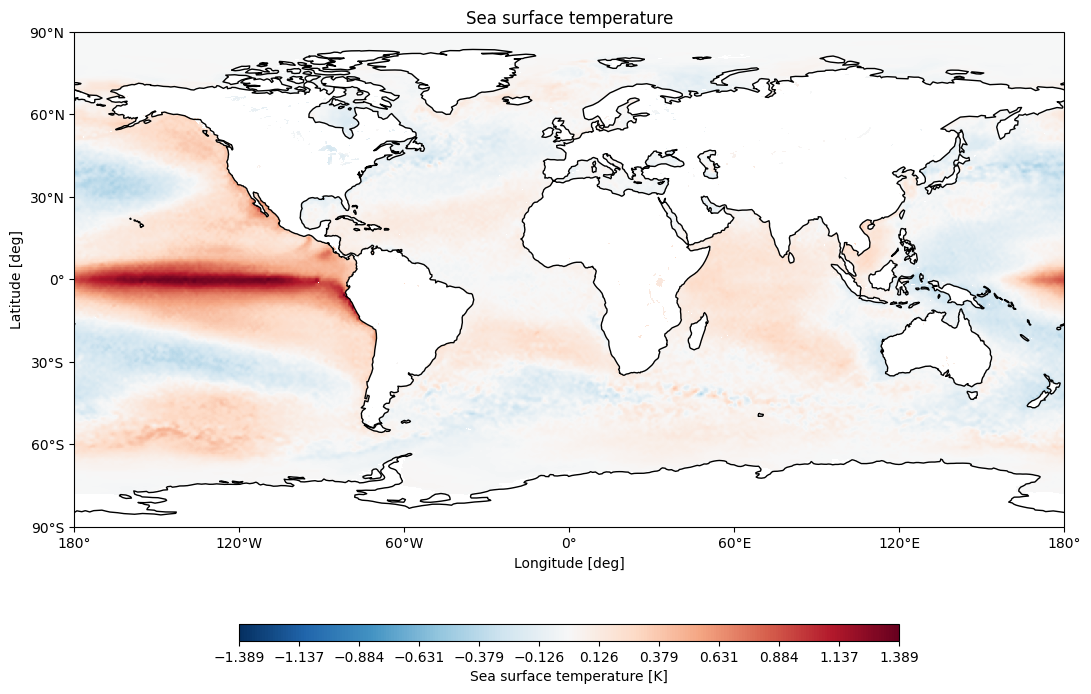

In [45]:
plot_single_map(data=tc.regression, loglevel='DEBUG', save=True)